# **Digital Audio**

Digital audio is audio system that collect, construct and arrange to new audio data that computer can read. Computer can not read analog wave so, we need to convert analog to digital (0,1). So in process to convert to digital has 2 major component: Sampling rate and Bit depth, both will be use for reconstruct to waveform.

### Sampling Theory  
Nyquist theorem, aliasing, and sample rates

#### Sampling rate (Like frame rate in video)  

- `Sampling`: is how continuous time signal convert into discrete time signal and the sampling rate is the number of samples taken per second when convert continous analog signal to discrete digital signal. The higher sampling rate, more capture of the audio signal. In audio sampling rate is measured in kiloHertz (kHz) and it determines the range of frequencies captured in digital audio.

<img src="digital_audio\ADC.png" width="800" style="display: block; margin: auto;">

- `The Nyquist Theorem`: sampled at a rate at least two times the highest frequency component in the signal. If the highest frequency components are not more than half the sampling rate can be accurately digitized.

<img src="digital_audio\nyquist.png" width="600" style="display: block; margin: auto;">

The most commonly sample rate used in music production is 44.1kHz, which is suitable for capturing frequencies up to 20kHz, the upper limit of human hearing. However, some high end audio support sampling rate for 192kHz, providing even greater accuracy and fildelity (how accurately a copy reproduces its source).  
[Audio Sampling rate comparison](https://www.youtube.com/watch?v=hRhVb6iRArg)

- `Aliasing` is a distortion when sampling rate is lower than the highest frequency or under sampling. This causes higher frequency to appear as lower frequency, leading to misrepresentation to original signal.

<img src="digital_audio\aliasing.png" width="600" style="display: block; margin: auto;">


### Bit Depth & Quantization  
16-bit vs. 24-bit vs. 32-bit float audio.

`Bit depth` is directly influences the dynamics range of audio recording, the range between the quiestest to the loudest part of the audio record. More higher bit depth means more dynamic range and more accurate representation of the original sound.

<img src="digital_audio\bit_depth.png" width="600" style="display: block; margin: auto;">

Bit depth effect to dynamic range ?  
Each "bit" equal to 6dB  
- 8 bit - 48dB
- 16 bit - 96dB
- 24 bit - 144dB
- 32 bit - 192dB

Higher bit depth means a greater dynamic range possible because it has a greater range of values availiable to assign to the amplitude of the analog signal.

[Audio bit depth comparison](https://youtu.be/JdaVghXJ_4E?si=fWY8R0bqTRPXH4uZ)


`Quantization`, is process of mapping from Analog to digital and the difference between analog value and quantized value (digital value) is reffered to a quantization error, noise or distortion.

<img src="digital_audio\quantization.png" width="600" style="display: block; margin: auto;">

As we convert analog signals into audio, some details get lost in translation but higher bit depth can reduces quatization noise by larger set of availiable values for each audio sample.



### Audio File Formats  
MP3, WAV, FLAC, OGG, AAC, etc.

Audio file formats are types of digital files that stored, compressed, and encoded audio data

File formats are 4 format 
- Uncompressed Audio Format: raw, high fidelity, best quality (WAV, AIFF, PCM, BWF, etc.)
- Lossless Compressed Audio Format: reduce file size without losing audio quality by applying reversible compression (FLAC, ALAC, WavPack, APE, etc.)
- Lossy Compressed Audio Format: reduce file size by removeing inaudible sound data. (MP3, AAC, OGG, OPUS, etc.)
- Specialized Audio Format: for specific application, game audio, surround sound, or MIDI music (MIDI, BWF, DTS/Dolby Digital, etc.)

### Digital Signal Processing (DSP)  
Filtering, convolution, FFT.

### Reference:  
https://ccrma.stanford.edu/CCRMA/Courses/SoundSynthesis/Lectures/3/Slides.html  
https://neurotext.library.stonybrook.edu/C7/C7_1/C7_1.html  
https://www.researchgate.net/publication/379442966_Exploring_the_potential_of_smartphone_MEMS_sensors_for_cost-effective_rotating_machinery_speed_estimation/figures?lo=1  
https://www.lalal.ai/blog/sample-rate-bit-depth-explained/  
https://unison.audio/bit-depth/
https://www.musicguymixing.com/bit-depth/

### Create audio file

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from pydub import AudioSegment
import os
import librosa

sample_rate = 44100  # CD quality
duration = 5  # 2 seconds
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
audio_wave = 0.5 * np.sin(2 * np.pi * 261.6 * t)  # Amplitude scaled to 0.5

# Save as WAV (uncompressed)
write("sine_wave.wav", sample_rate, (audio_wave * 32767).astype(np.int16))  # Convert to int16

# Convert WAV to FLAC and MP3 using pydub
os.environ["PATH"] += os.pathsep + "C:\\ProgramData\\chocolatey\\bin"

wav_audio = AudioSegment.from_file("sine_wave.wav")
wav_audio.export("sine_wave.flac", format="flac")
wav_audio.export("sine_wave.mp3", format="mp3", bitrate="320k")  # High-quality MP3


CouldntEncodeError: Encoding failed. ffmpeg/avlib returned error code: 3221225781

Command:['ffmpeg', '-y', '-f', 'wav', '-i', 'C:\\Users\\napat\\AppData\\Local\\Temp\\tmpq0wh2oms', '-f', 'flac', 'C:\\Users\\napat\\AppData\\Local\\Temp\\tmp2oa3plv2']

Output from ffmpeg/avlib:



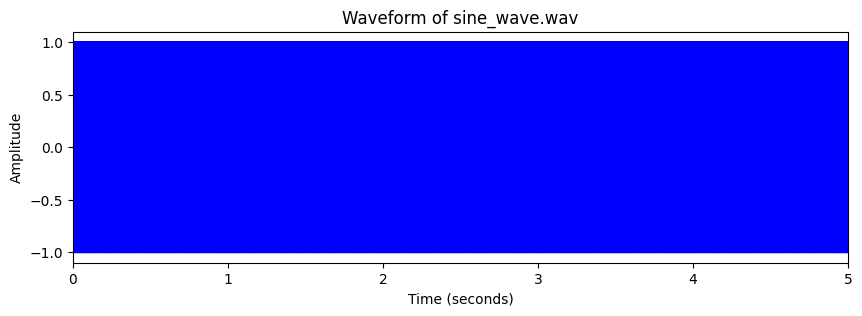

In [15]:
# Load the audio file (change filename as needed)
file_path = "sine_wave.wav"  # Change to "sine_wave.mp3" or "sine_wave.flac" if needed
audio = AudioSegment.from_file(file_path)
samples = np.array(audio.get_array_of_samples(), dtype=np.float32)

# Normalize audio for better visualization
samples = samples / np.max(np.abs(samples))

# Generate time axis
duration = len(samples) / audio.frame_rate  # Duration in seconds
time = np.linspace(0, duration, num=len(samples))

# Plot the waveform
plt.figure(figsize=(10, 3))
plt.plot(time, samples, color="blue")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title(f"Waveform of {file_path}")
plt.xlim([0, duration])  # Set limits for better visibility
plt.show()


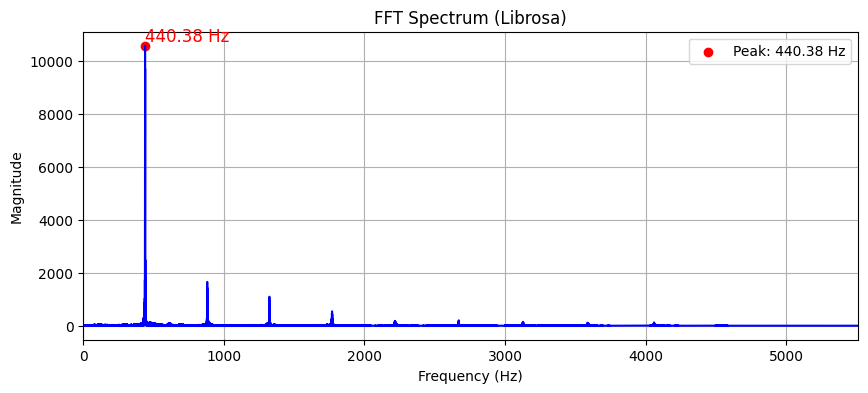

In [16]:
# Load audio file
y, sr = librosa.load("A4_piano.mp3", sr=None)

# Compute FFT
fft_output = np.abs(np.fft.fft(y))[:len(y)//2]
frequencies = np.linspace(0, sr//2, len(fft_output))

peak_index = np.argmax(fft_output)
peak_frequency = frequencies[peak_index]
peak_magnitude = fft_output[peak_index]

# Plot FFT with Peak Frequency Label
plt.figure(figsize=(10, 4))
plt.plot(frequencies, fft_output, color="blue")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT Spectrum (Librosa)")

# Mark and Label the Peak Frequency
plt.scatter(peak_frequency, peak_magnitude, color='red', label=f"Peak: {peak_frequency:.2f} Hz")
plt.text(peak_frequency, peak_magnitude, f"{peak_frequency:.2f} Hz", color='red', fontsize=12, verticalalignment='bottom')

# Set x-axis limit
plt.xlim(0, sr//8)
plt.grid()
plt.legend()
plt.show()


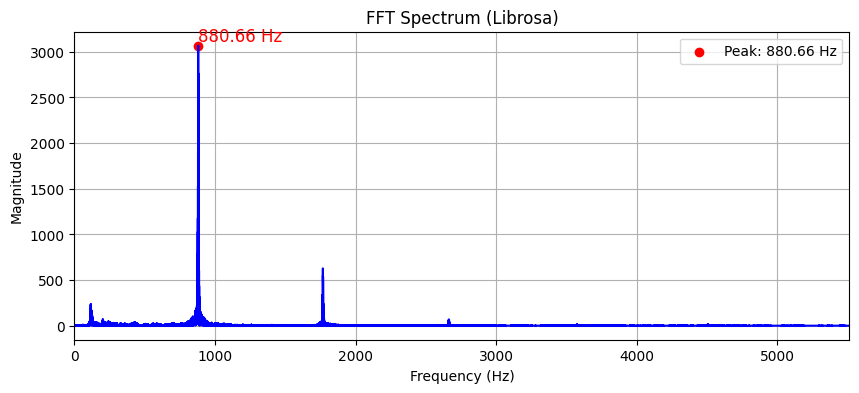

In [17]:
# Load audio file
y, sr = librosa.load("A5_piano.mp3", sr=None)

# Compute FFT
fft_output = np.abs(np.fft.fft(y))[:len(y)//2]
frequencies = np.linspace(0, sr//2, len(fft_output))

peak_index = np.argmax(fft_output)
peak_frequency = frequencies[peak_index]
peak_magnitude = fft_output[peak_index]

# Plot FFT with Peak Frequency Label
plt.figure(figsize=(10, 4))
plt.plot(frequencies, fft_output, color="blue")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT Spectrum (Librosa)")

# Mark and Label the Peak Frequency
plt.scatter(peak_frequency, peak_magnitude, color='red', label=f"Peak: {peak_frequency:.2f} Hz")
plt.text(peak_frequency, peak_magnitude, f"{peak_frequency:.2f} Hz", color='red', fontsize=12, verticalalignment='bottom')

# Set x-axis limit
plt.xlim(0, sr//8)
plt.grid()
plt.legend()
plt.show()

In [18]:
def generate_sine_wave(frequency, duration, sample_rate=44100, amplitude=0.5):
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    return t, amplitude * np.sin(2 * np.pi * frequency * t)

def mix_sine_waves(base_wave, new_wave):
    return base_wave + new_wave  # Add both signals together

def save_and_convert_audio(audio_wave, sample_rate=44100, filename="combined_sine_wave"):
    # Normalize and save WAV
    write(f"{filename}.wav", sample_rate, (audio_wave * 32767).astype(np.int16))

    # Convert WAV to FLAC and MP3
    os.environ["PATH"] += os.pathsep + "C:\\ProgramData\\chocolatey\\bin"
    wav_audio = AudioSegment.from_file(f"{filename}.wav")
    wav_audio.export(f"{filename}.flac", format="flac")
    wav_audio.export(f"{filename}.mp3", format="mp3", bitrate="320k")  # High-quality MP3

sample_rate = 44100  # CD quality
duration = 5  # 5 seconds

t, base_wave = generate_sine_wave(261.6, duration, sample_rate, amplitude=0.3)
_, extra_wave = generate_sine_wave(329.6, duration, sample_rate, amplitude=0.3)
_, extra_wave_1 = generate_sine_wave(392.0, duration, sample_rate, amplitude=0.3)

# Mix the sine waves together
mixed_wave = mix_sine_waves(base_wave, extra_wave)
mixed_wave_1 = mix_sine_waves(mixed_wave, extra_wave_1)

# Save and convert the mixed audio
save_and_convert_audio(mixed_wave_1, sample_rate, "mixed_sine_wave")

# Plot the mixed wave
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], mixed_wave[:1000], label="Mixed Wave (2000 Hz + 500 Hz)", color="blue")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Mixed Sine Wave")
plt.legend()
plt.show()


CouldntEncodeError: Encoding failed. ffmpeg/avlib returned error code: 3221225781

Command:['ffmpeg', '-y', '-f', 'wav', '-i', 'C:\\Users\\napat\\AppData\\Local\\Temp\\tmp7qy7a9zh', '-f', 'flac', 'C:\\Users\\napat\\AppData\\Local\\Temp\\tmpu6lx3ve1']

Output from ffmpeg/avlib:



In [ ]:
audio_path = "mixed_sine_wave.wav"
y, sr = librosa.load(audio_path, sr=44100)  # Load at 16kHz for better accuracy


In [ ]:
# Compute Mel spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)

# Convert to dB scale
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Display
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=512, x_axis="time", y_axis="mel")
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()
